<a href="https://colab.research.google.com/github/Elay-math/Metodos-Numericos-/blob/main/MetodoEuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  t_i     w_i (Euler)          y(t_i)         |y - w|
  0.0       0.5000000       0.5000000       0.0000000
  0.2       0.8000000       0.8292986       0.0292986
  0.4       1.1520000       1.2140877       0.0620877
  0.6       1.5504000       1.6489406       0.0985406
  0.8       1.9884800       2.1272295       0.1387495
  1.0       2.4581760       2.6408591       0.1826831
  1.2       2.9498112       3.1799415       0.2301303
  1.4       3.4517734       3.7324000       0.2806266
  1.6       3.9501281       4.2834838       0.3333557
  1.8       4.4281538       4.8151763       0.3870225
  2.0       4.8657845       5.3054720       0.4396874


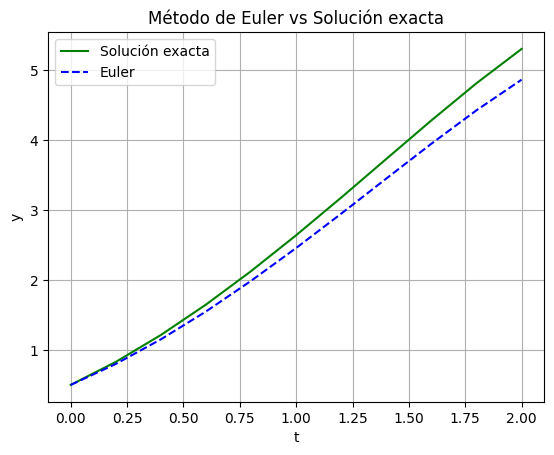


Método de Taylor orden 4:
  t_i    w_i (Taylor)          y(t_i)         |y - w|
  0.0       0.5000000       0.5000000       0.0000000
  0.2       0.8293000       0.8292986       0.0000014
  0.4       1.2140910       1.2140877       0.0000034
  0.6       1.6489468       1.6489406       0.0000062
  0.8       2.1272396       2.1272295       0.0000101
  1.0       2.6408744       2.6408591       0.0000153
  1.2       3.1799640       3.1799415       0.0000225
  1.4       3.7324321       3.7324000       0.0000321
  1.6       4.2835285       4.2834838       0.0000447
  1.8       4.8152377       4.8151763       0.0000615
  2.0       5.3055554       5.3054720       0.0000834


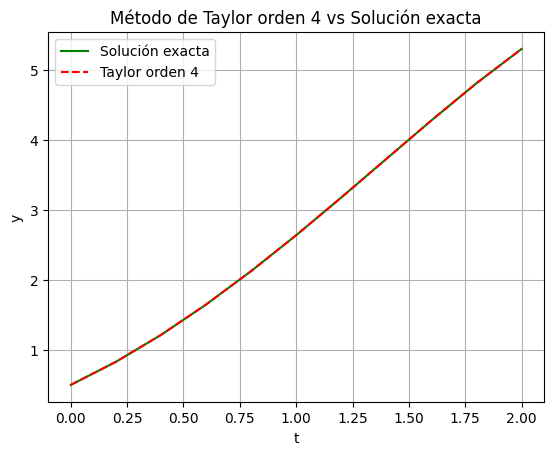

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

# ------------------------------------
# Parte 1: Método de Euler (Algoritmo 5.1)
# ------------------------------------

def f(t, y):
    return y - t**2 + 1

def y_exact(t):
    return (t + 1)**2 - 0.5 * np.exp(t)
#valores iniciales
a = 0
b = 2
N = 10
h = (b - a) / N
t_vals = np.linspace(a, b, N + 1)
w_vals = np.zeros(N + 1)
y_vals = y_exact(t_vals)
error_abs = np.zeros(N + 1)

# Condición inicial
w_vals[0] = 0.5

# Algoritmo de Euler
for i in range(N):
    w_vals[i + 1] = w_vals[i] + h * f(t_vals[i], w_vals[i])

# Cálculo de errores
error_abs = np.abs(y_vals - w_vals)

# Tabla de resultados
print(f"{'t_i':>5} {'w_i (Euler)':>15} {'y(t_i)':>15} {'|y - w|':>15}")
for i in range(N + 1):
    print(f"{t_vals[i]:5.1f} {w_vals[i]:15.7f} {y_vals[i]:15.7f} {error_abs[i]:15.7f}")

# Gráfica
plt.plot(t_vals, y_vals, label="Solución exacta", color='green')
plt.plot(t_vals, w_vals, label="Euler", linestyle='--', color='blue')
plt.title("Método de Euler vs Solución exacta")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------
# Parte 2: Método de Taylor (orden 4)
# ------------------------------------

# Derivadas sucesivas de f(t, y) = y - t^2 + 1
def taylor_terms(t, y):
    # f = y - t^2 + 1
    f1 = y - t**2 + 1
    f2 = f1 - 2*t        # df/dt + df/dy * f1
    f3 = f2 - 2          # segunda derivada menos constante
    f4 = f3              # constante (derivada de -2 es 0)
    return [f1, f2, f3, f4]

# Reiniciamos
w_taylor = np.zeros(N + 1)
w_taylor[0] = 0.5

# Método de Taylor orden 4
for i in range(N):
    t = t_vals[i]
    w = w_taylor[i]
    terms = taylor_terms(t, w)
    sum_terms = sum((h**(k+1)/factorial(k+1)) * terms[k] for k in range(4))
    w_taylor[i + 1] = w + sum_terms

error_taylor = np.abs(y_vals - w_taylor)

# Tabla de resultados
print("\nMétodo de Taylor orden 4:")
print(f"{'t_i':>5} {'w_i (Taylor)':>15} {'y(t_i)':>15} {'|y - w|':>15}")
for i in range(N + 1):
    print(f"{t_vals[i]:5.1f} {w_taylor[i]:15.7f} {y_vals[i]:15.7f} {error_taylor[i]:15.7f}")

# Gráfica
plt.plot(t_vals, y_vals, label="Solución exacta", color='green')
plt.plot(t_vals, w_taylor, label="Taylor orden 4", linestyle='--', color='red')
plt.title("Método de Taylor orden 4 vs Solución exacta")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

